# Numerical Techniques 1: Stability

## Introduction
This notebook illustrates the concept of numerical stability by applying the upstream scheme to the constant 1D advection equation.

The constant 1D advection equation is given by

$$\frac{\partial \psi}{\partial t}-c\frac{\partial\psi}{\partial x}=0,$$

where $\psi(t,x)$ is the field (e.g. temperature, tracer concentration, ...) advected in space and time, and $c$ is the constant advection speed.

The upstream scheme discretizes this equation as

$$\frac{\phi_j^{n+1}-\phi_j^n}{\Delta t}-c\frac{\phi_j^n-\phi_{j-1}^n}{\Delta x}=0,$$

where $\phi_j^n$ represents the numerical solution at gridpoint $x=j\Delta x$ at time $t=n\Delta t$. From this equation, the solution at the next timestep is found from the solution at the current timestep through

$$\phi_j^{n+1}=(1-\mu)\phi_j^n+\mu\phi_{j-1}^n.$$

## Preparations: load numpy and matplotlib libraries

* numpy is a python library for (fast) computations
* matplotlib is a python library for plotting

In [1]:
## Load numpy and matplotlib libraries
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.ioff()
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100  # reduce to generate figures faster (but smaller)

## Parameter and coordinate definitions


In [2]:
# spatial parameters
nx=100
dx=1.0

# time parameters
nt=50
dt=1.0

# problem parameters
c=0.5
mu=c*dx/dt

# spatial coordinate
x=np.arange(nx)*dx   # np.arange generates a list from 0 to nx-1

# time coordinate
t=np.arange(nt)*dt

## Initial state and exact solution

The initial state is defined as a function $f$ of the spatial coordinate $x$. The exact solution at time $t$ is then given by $f(x-ct)$.

In [3]:
def initial_state(x):
    # gaussian bell
    
    # domain length
    L=nx*dx
    
    # first, make x periodic
    xp=x%L   # '%' is the modulo operator, i.e. the remainder after division by L. This makes x periodic with period L
    
    # next, rescale x to (-1,1)
    xr=(xp-L/2)/(L/2)
    
    # now, compute the gaussian bell
    y=np.exp( -10 * xr**2)
    return(y)

def exact_solution(x,t):
    return( initial_state(x-c*t) )

# compute initial state
phi0=initial_state(x)


## Plot initial state

<IPython.core.display.Javascript object>


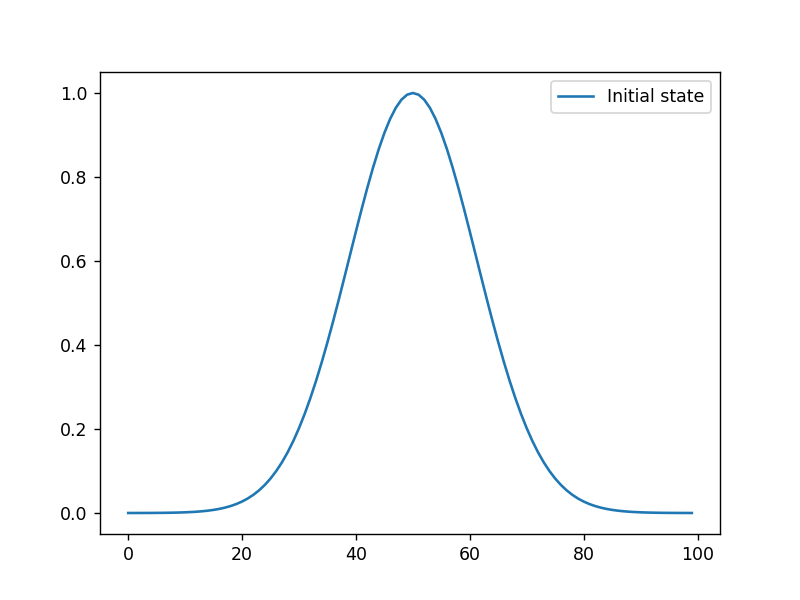

In [4]:
fig,ax=plt.subplots()
ax.plot(x,phi0,label="Initial state");
plt.legend()
display(fig)

## Animating results


In [6]:
def create_animation(psi=None,phi=None,frames=None):
    
    # create figure with axes
    fig,ax=plt.subplots()
    
    # determine frames to plot
    if frames is None:
        # number of timesteps
        nt=np.inf
        if not psi is None:
            nt=min(nt,psi.shape[0]-1)
        if not phi is None:
            nt=min(nt,phi.shape[0]-1)

        frames=np.arange(0,nt+1)
    else:
        nt=frames[-1]

    # create line for exact solution
    if not psi is None:
        ll_e=ax.plot(x,psi[frames[0],:],label='exact')[0]  # exact solution
    
    # create line for numerical solution
    if not phi is None:
        ll_n=ax.plot(x,phi[frames[0],:],label='numerical')[0]  # numerical solution
        
    # add legend
    plt.legend()
    
    # add title
    tt=plt.title('')
    

    def animate(iframe):
        if not psi is None:
            ll_e.set_ydata(psi[iframe,:])
        if not phi is None:
            ll_n.set_ydata(phi[iframe,:])
        tt.set_text('timestep %i/%i'%(iframe,nt))

    anim=animation.FuncAnimation(fig, animate, frames=frames,cache_frame_data=False,blit=True)
    display(anim)

## Numerical solution



In [14]:
# reset parameters
c=0.7
dt=1.0
nt=int(100/dt)
dx=1.0
nx=int(70/dx)
mu=c*dt/dx
print('mu = ',mu)

# define coordinates
x=np.arange(nx)*dx
t=np.arange(nt)*dt

# function to move forward in time from current timestep to next timestep
def timestep(phi_current):
    iL=(np.arange(nx)-1)%nx    # indices of points to the left, i.e. (nx-1,0,1,...,nx-2)
    phi_next=(1-mu)*phi_current+mu*phi_current[iL]
    return(phi_next)

# allocate numerical solution, initialize with zeros
psi=np.zeros((nt+1,nx))
phi=np.zeros((nt+1,nx))

# set initial state
phi[0,:]=initial_state(x)
psi[0,:]=initial_state(x)

# move forward in time
for jt in range(0,nt):
    psi[jt+1,:]=exact_solution(x,dt*(jt+1))
    phi[jt+1,:]=timestep(phi[jt,:])

# create animation
create_animation(psi,phi,frames=np.linspace(0,nt,20,dtype=int))


mu =  0.7
